In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/BoxOfficeMojo/box_office_mojo_cleaned.csv')
df = df.sort_values(by=['year'] , ascending= True)
df.head()

,date,occasion,top10_gross,top10_wow_change,num_releases,top_release,week_no,year,month_week,weekend
2703,Jul 22-24,NaN,"$7,000,644",+2.8%,1,Star Wars: Episode IV - A New Hope,29,1977,Jul_w3,1977_Jul_w3
2696,Sep 16-18,NaN,-,-,-,-,37,1977,Sep_w2,1977_Sep_w2
2695,Sep 23-25,NaN,-,-,-,-,38,1977,Sep_w3,1977_Sep_w3
2694,Oct 7-9,NaN,"$2,040,920",-,1,"Oh, God!",40,1977,Oct_w1,1977_Oct_w1
2693,Oct 7-10,Indig. Peoples' Day wknd,-,-,-,-,40,1977,Oct_w1,1977_Oct_w1


In [47]:
movie_box_office = df[['top10_gross' , 'top_release']]
# Replace '-' with NaN
movie_box_office['top10_gross'] = movie_box_office['top10_gross'].replace('-', np.nan)

# Remove dollar signs, commas, and convert to numeric
movie_box_office['top10_gross'] = movie_box_office['top10_gross'].replace('[\$,]', '', regex=True).astype(float)

movie_box_office

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_45170/3744666672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_box_office['top10_gross'] = movie_box_office['top10_gross'].replace('-', np.nan)
/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_45170/3744666672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_box_office['top10_gross'] = movie_box_office['top10_gross'].replace('[\$,]', '', regex=True).astype(float)


,top10_gross,top_release
2703,7000644.0,Star Wars: Episode IV - A New Hope
2696,NaN,-
2695,NaN,-
2694,2040920.0,"Oh, God!"
2693,NaN,-
...,...,...
1292,163527157.0,Transformers: Rise of the Beasts
1293,203338486.0,Spider-Man: Across the Spider-Verse
1294,160808155.0,The Little Mermaid
1285,307805201.0,Barbie


In [48]:
import requests
import pandas as pd

# Your TMDb API Key
API_KEY = '1a5413e0efff335584bf51d5d7db63f7'

# Base URL for TMDb API
BASE_URL = 'https://api.themoviedb.org/3'

# Function to get the budget of a movie by title
counter = 0

def get_movie_budget(title):
    global counter
    counter += 1

    # Print a message every 100 rows
    if counter % 100 == 0:
        print(f"Processed {counter} movies...")

    # Search for the movie by title
    search_url = f"{BASE_URL}/search/movie?api_key={API_KEY}&query={title}"
    response = requests.get(search_url)
    results = response.json().get('results')
    
    if results:
        # Get the movie ID of the first result
        movie_id = results[0]['id']
        
        # Fetch movie details using the movie ID
        details_url = f"{BASE_URL}/movie/{movie_id}?api_key={API_KEY}"
        response = requests.get(details_url)
        budget = response.json().get('budget')
        
        return budget
    else:
        return None

movie_box_office['budget'] = movie_box_office['top_release'].apply(get_movie_budget)


Processed 100 movies...
Processed 200 movies...
Processed 300 movies...
Processed 400 movies...
Processed 500 movies...
Processed 600 movies...
Processed 700 movies...
Processed 800 movies...
Processed 900 movies...
Processed 1000 movies...
Processed 1100 movies...
Processed 1200 movies...
Processed 1300 movies...
Processed 1400 movies...
Processed 1500 movies...
Processed 1600 movies...
Processed 1700 movies...
Processed 1800 movies...
Processed 1900 movies...
Processed 2000 movies...
Processed 2100 movies...
Processed 2200 movies...
Processed 2300 movies...
Processed 2400 movies...
Processed 2500 movies...
Processed 2600 movies...
Processed 2700 movies...


/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_45170/870649913.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_box_office['budget'] = movie_box_office['top_release'].apply(get_movie_budget)


In [49]:
movie_box_office = movie_box_office.dropna(subset=['top10_gross' , 'budget'])
movie_box_office

,top10_gross,top_release,budget
2703,7000644.0,Star Wars: Episode IV - A New Hope,11000000.0
2694,2040920.0,"Oh, God!",0.0
2691,4431635.0,Star Wars: Episode IV - A New Hope,11000000.0
2690,3292879.0,Star Wars: Episode IV - A New Hope,11000000.0
2689,2626914.0,Star Wars: Episode IV - A New Hope,11000000.0
...,...,...,...
1292,163527157.0,Transformers: Rise of the Beasts,195000000.0
1293,203338486.0,Spider-Man: Across the Spider-Verse,100000000.0
1294,160808155.0,The Little Mermaid,297000000.0
1285,307805201.0,Barbie,145000000.0


In [50]:
movie_box_office = movie_box_office[movie_box_office['budget'] != 0]

In [51]:
movie_box_office = movie_box_office.drop_duplicates(subset='top_release', keep='first')


In [60]:
movie_box_office

,top10_gross,top_release,budget
2703,7000644.0,Star Wars: Episode IV - A New Hope,11000000.0
2683,10102221.0,Close Encounters of the Third Kind,20000000.0
2709,16358821.0,The Deep,9000000.0
383,18807740.0,Jaws 2,20000000.0
393,2671060.0,Saturday Night Fever,3500000.0
...,...,...,...
1287,121030650.0,Insidious: The Red Door,16000000.0
1288,122142874.0,Indiana Jones and the Dial of Destiny,294700000.0
1290,106020773.0,Spider-Man: Across the Spider-Verse,100000000.0
1291,161297087.0,The Flash,300000000.0


In [53]:
# Normalize top10_gross
movie_box_office['top10_gross'] = (movie_box_office['top10_gross'] - movie_box_office['top10_gross'].min()) / (movie_box_office['top10_gross'].max() - movie_box_office['top10_gross'].min())

# Normalize budget
movie_box_office['budget'] = (movie_box_office['budget'] - movie_box_office['budget'].min()) / (movie_box_office['budget'].max() - movie_box_office['budget'].min())


In [63]:
movie_box_office.to_csv("movies_budgets.csv")

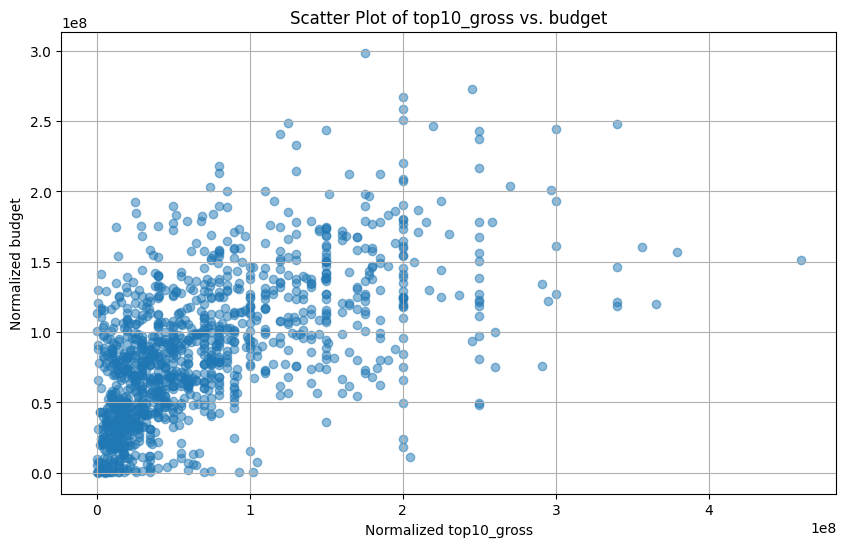

In [62]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movie_box_office['budget'], movie_box_office['top10_gross'], alpha=0.5)
plt.title('Scatter Plot of top10_gross vs. budget')
plt.xlabel('Normalized top10_gross')
plt.ylabel('Normalized budget')
plt.grid(True)
plt.show()


In [56]:
df_scatter = movie_box_office[['top10_gross' , 'budget']]

In [57]:
values_list = df_scatter.values.tolist()

In [58]:
with open('values_list.txt', 'w') as file:
    for row in values_list:
        file.write(f"      [{row[1]}, {row[0]}],\n")


In [59]:
df_scatter

,top10_gross,budget
2703,7000644.0,11000000.0
2683,10102221.0,20000000.0
2709,16358821.0,9000000.0
383,18807740.0,20000000.0
393,2671060.0,3500000.0
...,...,...
1287,121030650.0,16000000.0
1288,122142874.0,294700000.0
1290,106020773.0,100000000.0
1291,161297087.0,300000000.0
